In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import requests

In [15]:
request = requests.get("https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&start_date=2023-11-20&end_date=2023-12-03&hourly=temperature_2m,weather_code,is_day")

In [16]:
json_file = request.json()

In [17]:
json_file

{'latitude': 52.52,
 'longitude': 13.419998,
 'generationtime_ms': 0.06103515625,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 38.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'weather_code': 'wmo code',
  'is_day': ''},
 'hourly': {'time': ['2023-11-20T00:00',
   '2023-11-20T01:00',
   '2023-11-20T02:00',
   '2023-11-20T03:00',
   '2023-11-20T04:00',
   '2023-11-20T05:00',
   '2023-11-20T06:00',
   '2023-11-20T07:00',
   '2023-11-20T08:00',
   '2023-11-20T09:00',
   '2023-11-20T10:00',
   '2023-11-20T11:00',
   '2023-11-20T12:00',
   '2023-11-20T13:00',
   '2023-11-20T14:00',
   '2023-11-20T15:00',
   '2023-11-20T16:00',
   '2023-11-20T17:00',
   '2023-11-20T18:00',
   '2023-11-20T19:00',
   '2023-11-20T20:00',
   '2023-11-20T21:00',
   '2023-11-20T22:00',
   '2023-11-20T23:00',
   '2023-11-21T00:00',
   '2023-11-21T01:00',
   '2023-11-21T02:00',
   '2023-11-21T03:00',
   '2023-11-21T04:00',
   '2023-11-21T05:00',
 

In [18]:
temperature_dataframe = pd.DataFrame({"temperature" : json_file['hourly']['temperature_2m']}, index=json_file['hourly']['time'])

In [174]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(temperature_dataframe['temperature'], train_size=0.8, test_size=0.2)

In [175]:
dataset_train = train_data.to_numpy()
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(268, 1)

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(dataset_train)

In [177]:
# dataset_valid = validation_data.to_numpy() 
# dataset_valid = np.reshape(dataset_valid, (-1,1))
# scaled_valid = scaler.fit_transform(dataset_valid)

In [178]:
dataset_test = test_data.to_numpy() 
dataset_test = np.reshape(dataset_test, (-1,1))
scaled_test = scaler.fit_transform(dataset_test)

In [179]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

In [180]:
# X_valid = []
# y_valid = []
# for i in range(50, len(scaled_valid)):
#     X_valid.append(scaled_valid[i-50:i, 0])
#     y_valid.append(scaled_valid[i, 0])

In [181]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [182]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (218, 50, 1) y_train : (218, 1)


In [183]:
# X_valid, y_valid = np.array(X_valid), np.array(y_valid)

# X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1],1))
# y_valid = np.reshape(y_valid, (y_valid.shape[0],1))
# print("X_valid :",X_valid.shape,"y_valid :",y_valid.shape)

In [184]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (18, 50, 1) y_test : (18, 1)


In [189]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import keras

In [190]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer, metrics="mean_squared_error")
history = model.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
7/7 [==============================] - 24s 112ms/step - loss: 0.2501 - mean_squared_error: 0.2501
Epoch 2/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.4104 - mean_squared_error: 0.4104
Epoch 3/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.2941 - mean_squared_error: 0.2941
Epoch 4/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.2871 - mean_squared_error: 0.2871
Epoch 5/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.2478 - mean_squared_error: 0.2478
Epoch 6/1000
7/7 [==============================] - 1s 72ms/step - loss: 0.1984 - mean_squared_error: 0.1984
Epoch 7/1000
7/7 [==============================] - 1s 74ms/step - loss: 0.1746 - mean_squared_error: 0.1746
Epoch 8/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 9/1000
7/7 [==============================] - 1s 77ms/step - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 10/1000
7/7

In [191]:
y_simple_rnn = scaler.inverse_transform(model.predict(X_test))

1/1 [==============================] - 1s 947ms/step


In [60]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50))

regressor.add(Dense(units = 1,activation='sigmoid'))

regressor.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mean_squared_error"])

regressor.fit(X_train, y_train, epochs = 200, batch_size = 100)
regressor.summary()

Epoch 1/200
6/6 [==============================] - 4s 59ms/step - loss: 0.1360 - mean_squared_error: 0.1360
Epoch 2/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0910 - mean_squared_error: 0.0910
Epoch 3/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 4/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 5/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 6/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 7/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 8/200
6/6 [==============================] - 0s 61ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 9/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 10/200
6/6 [==========

In [78]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(Dense(25))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["mean_squared_error"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 100, 
                  epochs = 200)
regressorLSTM.summary()

Epoch 1/200
3/3 [==============================] - 7s 99ms/step - loss: 0.2602 - mean_squared_error: 0.2602
Epoch 2/200
3/3 [==============================] - 0s 66ms/step - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 3/200
3/3 [==============================] - 0s 66ms/step - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 4/200
3/3 [==============================] - 0s 61ms/step - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 5/200
3/3 [==============================] - 0s 77ms/step - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 6/200
3/3 [==============================] - 0s 60ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7/200
3/3 [==============================] - 0s 58ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 8/200
3/3 [==============================] - 0s 61ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 9/200
3/3 [==============================] - 0s 59ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 10/200
3/3 [==========

In [110]:
y_RNN = regressor.predict(X_test)

NameError: name 'regressor' is not defined

In [79]:
y_LSTM = scaler.inverse_transform(regressorLSTM.predict(X_test))

1/1 [==============================] - 1s 1s/step


In [81]:
y_LSTM

array([[0.61285   ],
       [0.6354609 ],
       [0.60011137],
       [0.61333454],
       [0.5385711 ],
       [0.6116755 ],
       [0.6868853 ],
       [0.6804766 ],
       [0.62226176],
       [0.636154  ],
       [0.61771494],
       [0.6346551 ],
       [0.5190598 ],
       [0.58717144],
       [0.58727837],
       [0.6375288 ],
       [0.6467225 ],
       [0.67508286]], dtype=float32)

In [162]:
y_simple_rnn

array([[-1.6659082],
       [ 2.6864333],
       [ 3.6061347],
       [-0.6388952],
       [ 6.2352843],
       [-5.2615824],
       [-2.1145465],
       [ 1.78499  ],
       [ 7.352931 ],
       [-1.3494549],
       [ 1.581636 ],
       [-1.2122693],
       [ 3.6652603],
       [ 1.0298233],
       [ 1.87318  ],
       [-5.434048 ],
       [-6.645874 ],
       [ 4.663246 ]], dtype=float32)

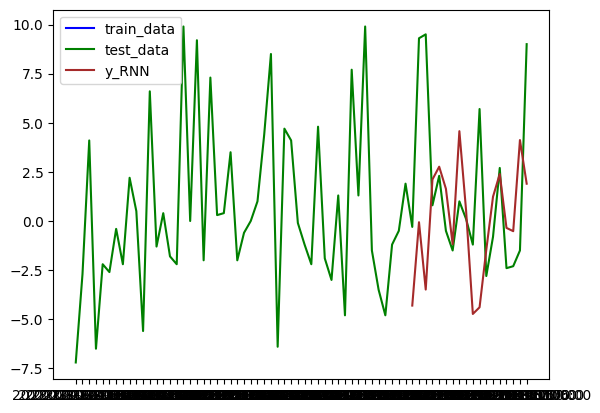

In [196]:
plt.plot(train_data.index[350:], train_data[350:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data, label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_simple_rnn, label = "y_RNN", color = "brown")
plt.legend()

In [19]:
request = requests.get("https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&start_date=2023-11-20&end_date=2023-12-03&hourly=temperature_2m,weather_code,is_day")

In [20]:
json_file = request.json()

In [21]:
temperature_dataframe = pd.DataFrame({"temperature" : json_file['hourly']['temperature_2m']}, index=json_file['hourly']['time'])

In [22]:
all_data = temperature_dataframe["temperature"]

In [23]:
from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler(feature_range=(0,1))
dataset_all = all_data.to_numpy() 
dataset_all = np.reshape(dataset_all, (-1,1))
scaled_all = train_scaler.fit_transform(dataset_all)

In [24]:
X_all = []
y_all = []
for i in range(50, len(scaled_all)):
    X_all.append(scaled_all[i-50:i, 0])
    y_all.append(scaled_all[i, 0])

In [25]:
X_train, y_train = np.array(X_all), np.array(y_all)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (286, 50, 1) y_train : (286, 1)


In [45]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import keras

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=30)

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer, metrics="mean_squared_error")
history = model.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 41ms/step - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 2/1000
9/9 [==============================] - 0s 45ms/step - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 3/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 4/1000
9/9 [==============================] - 0s 37ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 5/1000
9/9 [==============================] - 0s 40ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 6/1000
9/9 [==============================] - 0s 39ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 7/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 8/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 9/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 10/1000
9/9 [

In [4]:
request = requests.get("https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m,weather_code,is_day")

In [5]:
json_file = request.json()

In [6]:
temperature_dataframe = pd.DataFrame({"temperature" : json_file['hourly']['temperature_2m']}, index=json_file['hourly']['time'])

In [7]:
test_data = temperature_dataframe["temperature"]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
dataset_test = test_data.to_numpy() 
dataset_test = np.reshape(dataset_test, (-1,1))
scaled_test = scaler.fit_transform(dataset_test)

In [9]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [10]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (118, 50, 1) y_test : (118, 1)


In [27]:
predicted_temperature = model.predict(X_test)

4/4 [==============================] - 2s 35ms/step


In [47]:
#predicted_temperature = train_scaler.inverse_transform(predicted_temperature)

In [12]:
from keras.models import load_model

model = load_model("berlin_weather_forecast_model.h5")

In [13]:
predicted_temperature = scaler.inverse_transform(model.predict(X_test))

4/4 [==============================] - 2s 24ms/step


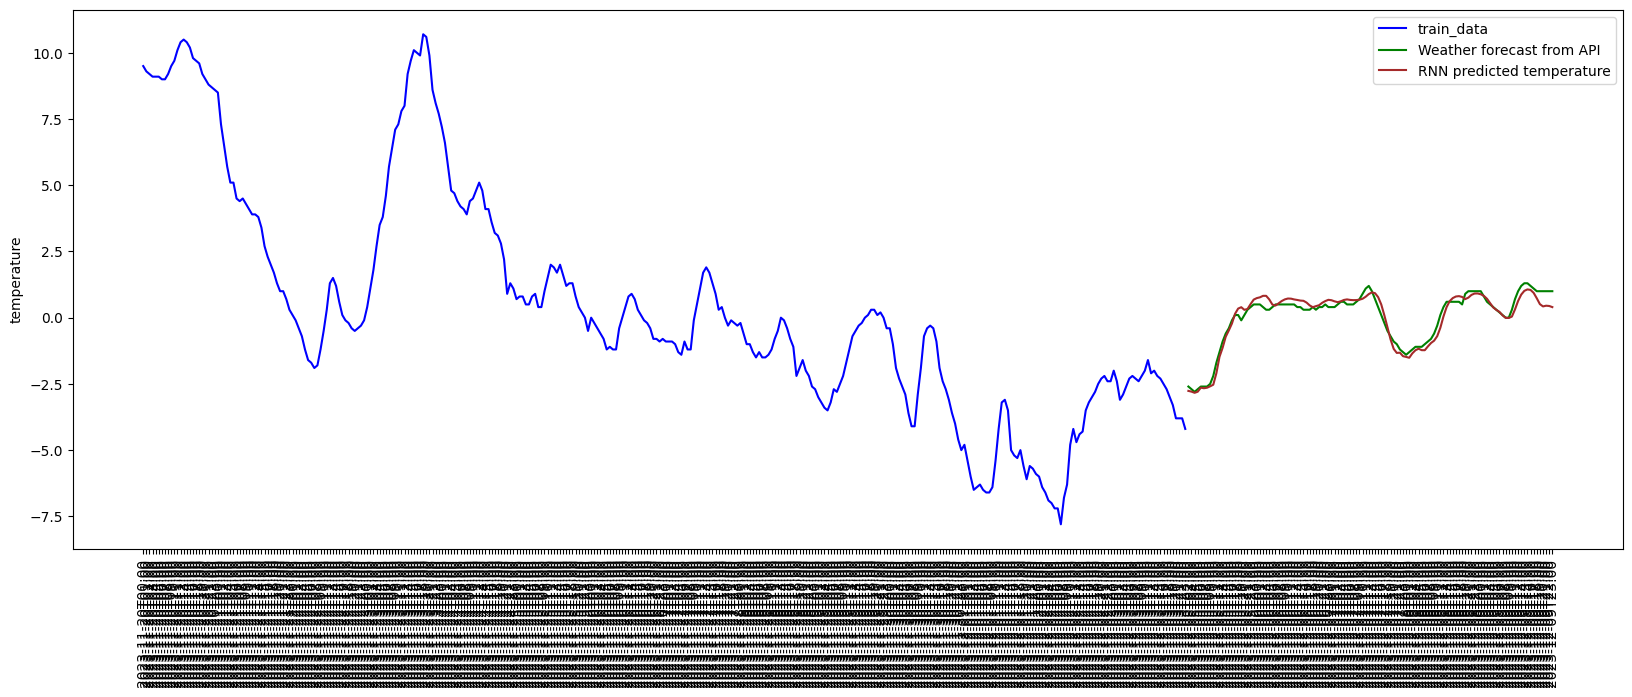

In [26]:
plt.figure(figsize=(20, 7))
plt.plot(all_data.index, all_data, label = "train_data", color = "b")
plt.plot(test_data.index[50:], test_data[50:], label = "Weather forecast from API", color = "g")
plt.plot(test_data.index[50:], predicted_temperature, label = "RNN predicted temperature", color = "brown")
plt.xticks(rotation=90)
plt.ylabel("temperature")
plt.legend()

In [34]:
len(test_data.index)

168

In [51]:
test_data.index[:50]

Index(['2023-12-03T00:00', '2023-12-03T01:00', '2023-12-03T02:00',
       '2023-12-03T03:00', '2023-12-03T04:00', '2023-12-03T05:00',
       '2023-12-03T06:00', '2023-12-03T07:00', '2023-12-03T08:00',
       '2023-12-03T09:00', '2023-12-03T10:00', '2023-12-03T11:00',
       '2023-12-03T12:00', '2023-12-03T13:00', '2023-12-03T14:00',
       '2023-12-03T15:00', '2023-12-03T16:00', '2023-12-03T17:00',
       '2023-12-03T18:00', '2023-12-03T19:00', '2023-12-03T20:00',
       '2023-12-03T21:00', '2023-12-03T22:00', '2023-12-03T23:00',
       '2023-12-04T00:00', '2023-12-04T01:00', '2023-12-04T02:00',
       '2023-12-04T03:00', '2023-12-04T04:00', '2023-12-04T05:00',
       '2023-12-04T06:00', '2023-12-04T07:00', '2023-12-04T08:00',
       '2023-12-04T09:00', '2023-12-04T10:00', '2023-12-04T11:00',
       '2023-12-04T12:00', '2023-12-04T13:00', '2023-12-04T14:00',
       '2023-12-04T15:00', '2023-12-04T16:00', '2023-12-04T17:00',
       '2023-12-04T18:00', '2023-12-04T19:00', '2023-12-04T20:

In [101]:
model.save("berlin_weather_forecast_model.h5")

/home/repositories/GB-World-Weather/env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
